In [0]:
import numpy as np
import torch
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision as tv
import torch.nn as nn
import torch.nn.functional as F
import os
from zipfile import ZipFile
from PIL import Image
from tqdm import tqdm

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
ten_path = '/content/drive/My Drive/Colab Notebooks/ten.pt'
ten = torch.load(ten_path)

In [0]:
len(ten)

2330

In [0]:
a_path = '/content/drive/My Drive/Colab Notebooks/a.npy'
a = np.load(a_path)

In [0]:
type(a)

numpy.ndarray

In [0]:
validation_per = 0.10300429184549356
epochs = 100
batch = 60
validation_size = int(len(ten)*validation_per)
print(validation_size)
train_x = ten[:-validation_size]
train_y = a[:-validation_size]

240


In [0]:
print(len(train_x))
print(type(train_x))
print(type(train_y))


2090
<class 'list'>
<class 'numpy.ndarray'>


In [0]:
validation_x = train_x[-validation_size:]
validation_y = train_y[-validation_size:]

In [0]:
print(type(validation_x))
print(type(validation_y))

<class 'list'>
<class 'numpy.ndarray'>


In [0]:
t_train_x = torch.Tensor(2097, 1, 255, 340)
torch.cat(train_x, out=t_train_x)

tensor([[[[0.5059, 0.4941, 0.5098,  ..., 0.0118, 0.0118, 0.0157],
          [0.5176, 0.4980, 0.4980,  ..., 0.0118, 0.0118, 0.0118],
          [0.5098, 0.5333, 0.5176,  ..., 0.0118, 0.0118, 0.0118],
          ...,
          [0.1098, 0.1098, 0.1020,  ..., 0.0902, 0.0941, 0.1059],
          [0.1176, 0.1059, 0.1059,  ..., 0.1059, 0.1098, 0.1098],
          [0.0980, 0.0824, 0.1020,  ..., 0.1216, 0.1176, 0.1176]]],


        [[[0.3451, 0.3451, 0.3412,  ..., 0.3882, 0.3961, 0.3843],
          [0.3451, 0.3451, 0.3412,  ..., 0.3765, 0.3843, 0.3843],
          [0.3529, 0.3529, 0.3490,  ..., 0.3765, 0.3765, 0.3804],
          ...,
          [0.3490, 0.3373, 0.3412,  ..., 0.5412, 0.6000, 0.6549],
          [0.3529, 0.3490, 0.3490,  ..., 0.6275, 0.6745, 0.6784],
          [0.3569, 0.3647, 0.3529,  ..., 0.6745, 0.6902, 0.6980]]],


        [[[0.7804, 0.8000, 0.8353,  ..., 0.3647, 0.3569, 0.3333],
          [0.7804, 0.8157, 0.8392,  ..., 0.3333, 0.3451, 0.3922],
          [0.8471, 0.8314, 0.8392,  ..

In [0]:
print(type(t_train_x))

<class 'torch.Tensor'>


In [0]:
t_validation_x = torch.Tensor(validation_size, 1, 255, 340)
torch.cat(validation_x, out=t_validation_x)

tensor([[[[0.2745, 0.2706, 0.2784,  ..., 0.7412, 0.7451, 0.7451],
          [0.2706, 0.2667, 0.2706,  ..., 0.7412, 0.7451, 0.7451],
          [0.2784, 0.2627, 0.2745,  ..., 0.7412, 0.7333, 0.7451],
          ...,
          [0.3294, 0.3294, 0.3294,  ..., 0.7529, 0.7529, 0.7608],
          [0.3373, 0.3255, 0.3451,  ..., 0.7529, 0.7529, 0.7608],
          [0.3333, 0.3451, 0.3490,  ..., 0.7569, 0.7490, 0.7569]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0196, 0.0000, 0.0000],
          ...,
          [0.0196, 0.0196, 0.0157,  ..., 0.0078, 0.0000, 0.0000],
          [0.0118, 0.0118, 0.0118,  ..., 0.0000, 0.0000, 0.0000],
          [0.0078, 0.0078, 0.0078,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0039, 0.0039],
          [0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0039, 0.0039],
          [0.0118, 0.0118, 0.0118,  ..

In [0]:
print(t_train_x.shape)
print(t_validation_x.shape)

torch.Size([2090, 1, 255, 340])
torch.Size([240, 1, 255, 340])


# Visualization

In [0]:
def get_co(lst):
    x = []
    y = []
    for a, b in lst:
        x.append(a)
        y.append(b)
    return x, y 

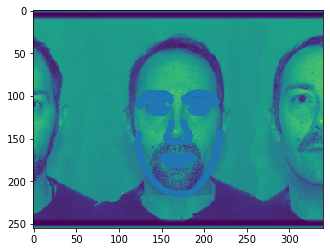

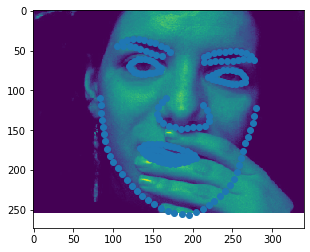

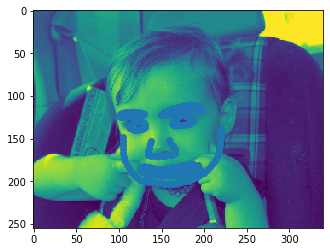

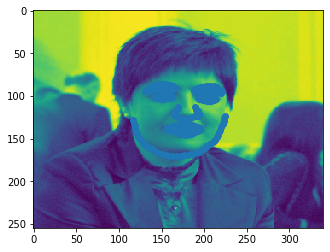

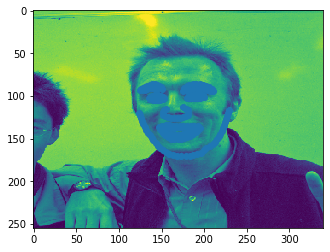

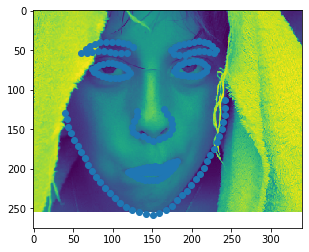

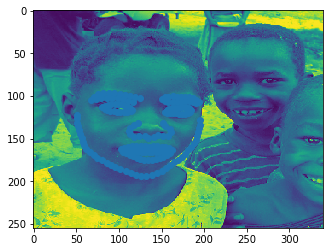

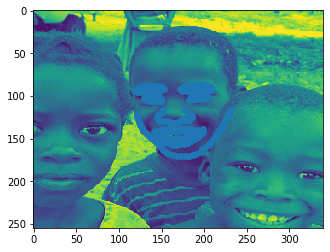

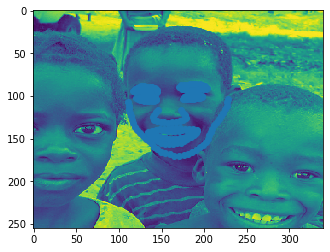

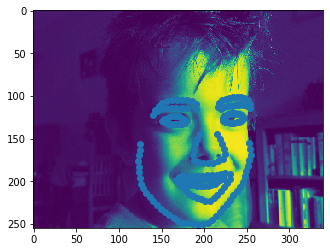

In [0]:
for i in range(10,20):
    plt.imshow(t_validation_x[i].view(255,340))
    x, y = get_co(validation_y[i])
    plt.scatter(x, y)
    plt.show()

In [0]:
class UnNormalize(object):
    def __init__(self, mean, std):
        self.mean = mean
        self.std = std

    def __call__(self, tensor):
        """
        Args:
            tensor (Tensor): Tensor image of size (C, H, W) to be normalized.
        Returns:
            Tensor: Normalized image.
        """
        for t, m, s in zip(tensor, self.mean, self.std):
            t.mul_(s).add_(m)
            # The normalize code -> t.sub_(m).div_(s)
        return tensor

#Network

In [0]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.c1 = nn.Conv2d(in_channels = 1, out_channels = 32, stride=1, kernel_size=2)
        self.c2 = nn.Conv2d(in_channels = 32, out_channels = 64, stride = 1, kernel_size=2)
        self.c3 = nn.Conv2d(in_channels = 64, out_channels = 128, stride = 1, kernel_size=2)
        self.c4 = nn.Conv2d(in_channels = 128, out_channels = 256, stride = 1, kernel_size=2)
        self.c5 = nn.Conv2d(in_channels = 256, out_channels = 256, stride = 1, kernel_size=2)
        self.c6 = nn.Conv2d(in_channels = 256, out_channels = 256, stride = 1, kernel_size=2)
        #self.c7 = nn.Conv2d(in_channels = 256, out_channels = 512, stride = 1, kernel_size=2)
        #self.c8 = nn.Conv2d(in_channels = 512, out_channels = 512, stride = 1, kernel_size=2)
        #self.c9 = nn.Conv2d(in_channels = 512, out_channels = 512, stride = 1, kernel_size=2)
        #x = torch.randn(255,340).view(-1,1,255,340)
        #self.x = x
        self._ln_output = None
        #self.convs(x)
        self.ln1 = nn.Linear(in_features= 256*3*4, out_features= 500)
        self.ln2 = nn.Linear(in_features= 500, out_features= 193*2)
        #self.optimizer = optim.Adam(net.parameters(), lr=0.01)
        #self.loss_function = nn.MSELoss()
        
    def convs(self, x):
        x = F.max_pool2d(F.leaky_relu(self.c1(x)), (2,2))
        x = F.max_pool2d(F.leaky_relu(self.c2(x)), (2,2))
        x = F.max_pool2d(F.leaky_relu(self.c3(x)), (2,2))
        x = F.max_pool2d(F.leaky_relu(self.c4(x)), (2,2))
        x = F.max_pool2d(F.leaky_relu(self.c5(x)), (2,2))
        x = F.max_pool2d(F.leaky_relu(self.c6(x)), (2,2))
        #x = F.relu(self.c7(x))
        #x = F.max_pool2d(F.relu(self.c8(x)), (2,2))
        #x = F.max_pool2d(F.relu(self.c9(x)), (2,2))
        
        #print(x[0].shape)
        #if self._ln_output is None:
         #   self._ln_output = x.shape[0]*x.shape[1]*x.shape[2]
          #  print('neurons = ', self._ln_output)
        self._ln_output = 256*3*4
        return x
                         
    def forward(self, dat):
        dat = self.convs(dat)
        dat = dat.view(-1, self._ln_output)  # .view is reshape ... this flattens X before 
        dat = F.leaky_relu(self.ln1(dat))
        dat = F.leaky_relu(self.ln2(dat))

        return dat
    
    def optimise(self,outputs):
        loss = self.loss_function(outputs, batch_y)
        loss.backward()
        self.optimizer.step()

In [0]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")  # you can continue going on here, like cuda:1 cuda:2....etc. 
    print("Running on the GPU")
else:
    device = torch.device("cpu")
    print("Running on the CPU")

Running on the GPU


In [0]:
net = Net().to(device)
t_tensor = transforms.ToTensor()
optimizer = optim.Adam(net.parameters(), lr = 0.01)
batch = 10
epochs = 1
loss_function = nn.MSELoss()
# for i in range(epochs):
for j in (range(epochs)):
    print(f"Epoch: {j}")
    for i in tqdm(range(0, len(t_train_x), batch)): # from 0, to the len of x, stepping BATCH_SIZE at a time. [:50] ..for now just to dev
        #print(f"{i}:{i+BATCH_SIZE}")
        
        batch_X = t_train_x[i:i+batch]
        #print(type(batch_X))
        
        
#         batch_X = batch_X/255.0
#         print(batch_X)
#         input()
        batch_y = torch.FloatTensor(train_y[i:i+batch])
        print(batch_y.shape)
        batch_y = batch_y.view(batch,193*2)
        print(type(batch_X))
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
       # print(batch_y.shape[2])

        net.zero_grad()
        optimizer.zero_grad()

        outputs = net.forward(batch_X)
        
        loss = loss_function(outputs, batch_y)
        loss.backward()
        optimizer.step()    # Does the update
        #final = net.optimise(outputs)
        print(f"LOSS :{loss}")


  1%|▏         | 3/209 [00:00<00:09, 21.03it/s]

Epoch: 0
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :26949.2109375
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :23794.48828125
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :9956364.0
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :17116.552734375
torch.Size([10, 193, 2])
<class 'torch.Tensor'>


  5%|▍         | 10/209 [00:00<00:07, 25.02it/s]

LOSS :23916.345703125
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :24741.794921875
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :4809.41259765625
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :1184699.875
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :23678.34375
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :27504.3359375
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :13245.8681640625
torch.Size([10, 193, 2])
<class 'torch.Tensor'>


  9%|▊         | 18/209 [00:00<00:06, 28.73it/s]

LOSS :26060.583984375
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :28159.197265625
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :27706.849609375
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :28208.625
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :29315.1796875
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :25232.552734375
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :27451.3046875
torch.Size([10, 193, 2])
<class 'torch.Tensor'>


 11%|█         | 22/209 [00:00<00:06, 29.94it/s]

LOSS :24727.48828125
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :27360.826171875
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :25295.548828125
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :23748.541015625
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :23256.73828125
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :28208.7109375
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :27232.912109375
torch.Size([10, 193, 2])
<class 'torch.Tensor'>


 14%|█▍        | 30/209 [00:00<00:05, 31.65it/s]

LOSS :23666.01171875
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :26955.560546875
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :26782.505859375
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :20569.134765625
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :24723.814453125
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :21082.9140625
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :15866.3076171875
torch.Size([10, 193, 2])
<class 'torch.Tensor'>


 18%|█▊        | 38/209 [00:01<00:05, 32.62it/s]

LOSS :10411.9443359375
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :13315.21484375
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :25419.51953125
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :37503.0
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :27564.859375
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :10732.033203125
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :17495.962890625
torch.Size([10, 193, 2])
<class 'torch.Tensor'>


 22%|██▏       | 46/209 [00:01<00:04, 33.11it/s]

LOSS :4258.9150390625
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :5625.51123046875
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :11839.2236328125
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :5787.29150390625
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :4900.63525390625
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :4789.10595703125
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :5435.63037109375
torch.Size([10, 193, 2])
<class 'torch.Tensor'>


 24%|██▍       | 50/209 [00:01<00:04, 33.23it/s]

LOSS :26567.765625
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :5901.232421875
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :3637.596923828125
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :2885.976806640625
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :2820.3154296875
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :4031.1923828125
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :2953.45361328125
torch.Size([10, 193, 2])
<class 'torch.Tensor'>


 28%|██▊       | 58/209 [00:01<00:04, 33.22it/s]

LOSS :2845.00537109375
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :3031.55126953125
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :2473.412841796875
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :2926.529541015625
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :2991.4677734375
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :3818.145751953125
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :2863.123779296875
torch.Size([10, 193, 2])
<class 'torch.Tensor'>


 32%|███▏      | 66/209 [00:02<00:04, 33.49it/s]

LOSS :2499.347412109375
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :3025.998046875
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :3032.68603515625
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :1991.7586669921875
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :2359.591552734375
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :2042.0592041015625
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :2777.939208984375
torch.Size([10, 193, 2])
<class 'torch.Tensor'>


 35%|███▌      | 74/209 [00:02<00:04, 33.64it/s]

LOSS :1994.5521240234375
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :1872.6492919921875
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :2229.803466796875
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :1952.086669921875
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :1961.5679931640625
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :1959.366943359375
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :1942.1383056640625
torch.Size([10, 193, 2])
<class 'torch.Tensor'>


 37%|███▋      | 78/209 [00:02<00:03, 33.58it/s]

LOSS :1725.121337890625
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :1899.6278076171875
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :1571.7337646484375
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :1581.39794921875
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :1439.7117919921875
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :1651.583251953125
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :1448.4730224609375
torch.Size([10, 193, 2])
<class 'torch.Tensor'>


 41%|████      | 86/209 [00:02<00:03, 33.52it/s]

LOSS :1336.5244140625
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :1718.8897705078125
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :1856.1217041015625
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :1473.7763671875
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :1429.697509765625
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :1943.43359375
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :2051.0419921875
torch.Size([10, 193, 2])
<class 'torch.Tensor'>


 45%|████▍     | 94/209 [00:02<00:03, 33.60it/s]

LOSS :1381.4964599609375
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :1813.117919921875
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :1281.1883544921875
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :1153.8026123046875
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :1502.9661865234375
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :1238.4342041015625
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :1387.676025390625
torch.Size([10, 193, 2])
<class 'torch.Tensor'>


 49%|████▉     | 102/209 [00:03<00:03, 33.57it/s]

LOSS :1461.622314453125
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :1599.4476318359375
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :1278.9425048828125
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :1454.6837158203125
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :1065.2115478515625
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :1681.18505859375
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :1994.4080810546875
torch.Size([10, 193, 2])
<class 'torch.Tensor'>


 51%|█████     | 106/209 [00:03<00:03, 33.49it/s]

LOSS :1721.981689453125
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :1815.8690185546875
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :1397.789306640625
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :1559.1160888671875
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :1709.2467041015625
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :1247.6014404296875
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :1084.7838134765625
torch.Size([10, 193, 2])
<class 'torch.Tensor'>


 55%|█████▍    | 114/209 [00:03<00:02, 33.51it/s]

LOSS :950.9764404296875
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :1078.725341796875
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :2037.981689453125
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :1179.2314453125
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :1257.1072998046875
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :862.7744140625
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :1202.0074462890625
torch.Size([10, 193, 2])
<class 'torch.Tensor'>


 58%|█████▊    | 122/209 [00:03<00:02, 33.47it/s]

LOSS :1063.2286376953125
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :1531.1278076171875
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :1321.7645263671875
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :1597.6849365234375
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :953.511474609375
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :1434.0380859375
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :1140.1990966796875
torch.Size([10, 193, 2])
<class 'torch.Tensor'>


 62%|██████▏   | 130/209 [00:03<00:02, 33.39it/s]

LOSS :1293.71435546875
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :1718.1336669921875
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :1521.1141357421875
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :1194.2388916015625
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :568.8869018554688
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :1558.091552734375
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :1440.0753173828125
torch.Size([10, 193, 2])
<class 'torch.Tensor'>


 64%|██████▍   | 134/209 [00:04<00:02, 33.44it/s]

LOSS :747.2220458984375
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :626.4034423828125
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :617.1062622070312
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :1075.4500732421875
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :1126.22900390625
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :1369.2261962890625
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :545.3386840820312
torch.Size([10, 193, 2])
<class 'torch.Tensor'>


 68%|██████▊   | 142/209 [00:04<00:02, 33.36it/s]

LOSS :1193.5003662109375
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :1268.4862060546875
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :558.22021484375
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :690.470947265625
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :305.4421081542969
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :921.7220458984375
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :781.8043823242188
torch.Size([10, 193, 2])
<class 'torch.Tensor'>


 72%|███████▏  | 150/209 [00:04<00:01, 33.37it/s]

LOSS :916.0706787109375
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :806.5641479492188
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :1136.8397216796875
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :1020.4519653320312
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :827.7216796875
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :496.8963623046875
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :651.8964233398438
torch.Size([10, 193, 2])
<class 'torch.Tensor'>


 76%|███████▌  | 158/209 [00:04<00:01, 33.45it/s]

LOSS :559.15283203125
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :1170.2783203125
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :1138.9775390625
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :1016.5321655273438
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :715.4263916015625
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :891.8461303710938
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :760.6005859375
torch.Size([10, 193, 2])
<class 'torch.Tensor'>


 78%|███████▊  | 162/209 [00:04<00:01, 33.42it/s]

LOSS :689.0732421875
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :1211.72216796875
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :1486.05419921875
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :1123.6107177734375
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :1452.87451171875
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :901.4032592773438
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :1015.2737426757812
torch.Size([10, 193, 2])
<class 'torch.Tensor'>


 81%|████████▏ | 170/209 [00:05<00:01, 33.37it/s]

LOSS :878.0064086914062
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :727.3872680664062
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :872.6663208007812
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :1024.861572265625
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :1213.4521484375
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :647.1585693359375
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :551.0367431640625
torch.Size([10, 193, 2])
<class 'torch.Tensor'>


 85%|████████▌ | 178/209 [00:05<00:00, 33.40it/s]

LOSS :1193.00390625
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :1262.7684326171875
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :848.6181640625
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :1406.3282470703125
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :1991.4676513671875
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :932.639404296875
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :2204.504638671875
torch.Size([10, 193, 2])
<class 'torch.Tensor'>


 89%|████████▉ | 186/209 [00:05<00:00, 33.30it/s]

LOSS :687.15185546875
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :1356.591796875
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :678.8652954101562
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :806.8532104492188
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :726.0548095703125
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :757.9560546875
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :964.8743896484375
torch.Size([10, 193, 2])
<class 'torch.Tensor'>


 91%|█████████ | 190/209 [00:05<00:00, 33.25it/s]

LOSS :686.7774658203125
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :842.3160400390625
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :1177.384521484375
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :462.39501953125
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :907.995361328125
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :955.2377319335938
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :804.7263793945312
torch.Size([10, 193, 2])
<class 'torch.Tensor'>


 95%|█████████▍| 198/209 [00:05<00:00, 33.17it/s]

LOSS :926.5490112304688
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :1137.1270751953125
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :915.1875
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :1405.1090087890625
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :817.2063598632812
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :1089.3509521484375
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :1274.1748046875
torch.Size([10, 193, 2])
<class 'torch.Tensor'>


 99%|█████████▊| 206/209 [00:06<00:00, 33.17it/s]

LOSS :1696.55126953125
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :717.4022216796875
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :827.723876953125
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :928.2440185546875
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :746.357421875
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :1426.083251953125
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :809.2430419921875
torch.Size([10, 193, 2])
<class 'torch.Tensor'>


100%|██████████| 209/209 [00:06<00:00, 33.04it/s]

LOSS :1118.634765625
torch.Size([10, 193, 2])
<class 'torch.Tensor'>
LOSS :426.8017272949219


In [0]:
p = []
for i in range(1,101):
  if(2090%i == 0):
    p.append(i)
print(p)

[1, 2, 5, 10, 11, 19, 22, 38, 55, 95]


In [0]:
(2330-2090)/2330

In [0]:
2330-2090

In [0]:
torch.cuda.is_available()


In [0]:
torch.cuda.device_count()

In [0]:
x = [3,5,7,2]
print(range(x))

In [0]:
max(batch_y[0])

In [0]:
net = Net()
x = torch.randn(255,340).view(-1,1,255,340)
net(x)

torch.Size([256, 3, 4])
neurons =  768
torch.Size([256, 3, 4])


tensor([[ 8.2064e-03, -6.1625e-05,  9.8769e-03,  ..., -2.2350e-05,
         -1.2249e-04,  5.5255e-03],
        [ 1.8921e-02, -4.8175e-06,  1.2107e-02,  ..., -8.7845e-05,
         -1.9474e-04,  1.0007e-02],
        [-8.7126e-05, -8.1528e-05, -1.9543e-04,  ..., -2.5519e-04,
          3.3482e-04,  8.5352e-03],
        [ 1.5746e-02, -1.5155e-04,  5.0374e-03,  ..., -2.9794e-04,
         -4.1916e-05,  5.5728e-03]], grad_fn=<LeakyReluBackward0>)

In [0]:
output = net.forward(t_validation_x.to(device))


RuntimeError: ignored

In [0]:
output.shape

torch.Size([240, 386])

In [0]:
output= output.view([240,193,2])

In [0]:
output[0]

tensor([[ 94.1616, 121.9680],
        [ 95.3326, 126.9058],
        [ 95.8045, 132.1782],
        [ 96.9437, 136.9122],
        [ 98.3228, 141.6784],
        [ 99.9554, 146.6111],
        [102.3983, 151.0938],
        [104.1080, 156.0484],
        [107.1730, 160.2531],
        [110.4219, 164.2433],
        [114.4401, 168.2663],
        [118.3636, 171.9712],
        [123.0804, 175.0329],
        [128.0021, 178.1587],
        [133.2485, 181.3416],
        [138.5486, 184.1479],
        [144.3739, 186.4431],
        [150.4928, 187.9335],
        [156.8759, 189.3775],
        [163.5353, 190.1867],
        [170.2386, 190.4824],
        [176.9738, 190.2675],
        [183.3977, 189.4422],
        [189.6777, 188.1293],
        [195.7624, 186.2687],
        [201.4496, 183.9699],
        [206.6206, 181.3753],
        [211.6168, 178.4741],
        [216.0898, 175.3384],
        [220.4012, 171.7469],
        [224.0450, 168.0416],
        [227.7073, 164.3461],
        [230.6719, 160.0152],
        [2

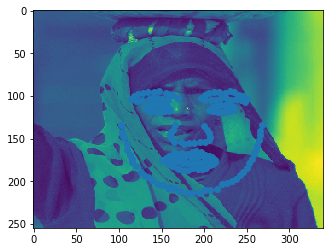

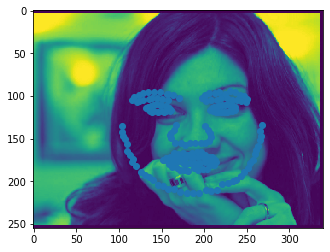

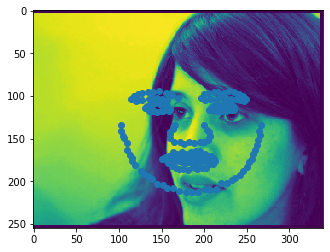

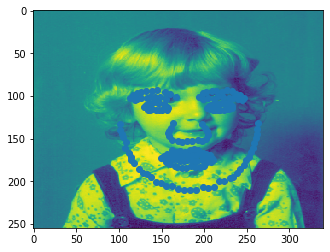

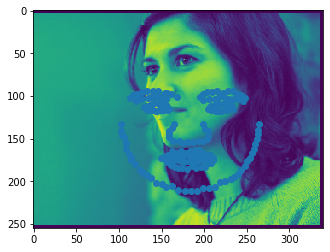

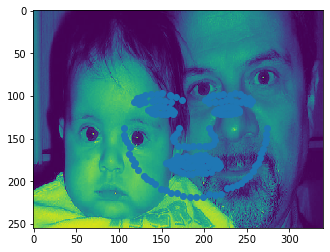

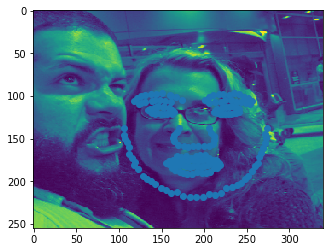

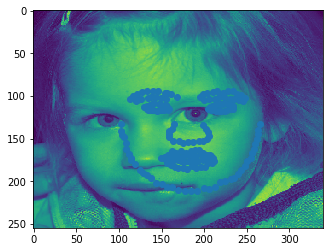

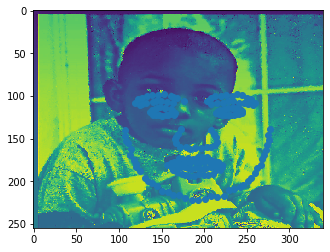

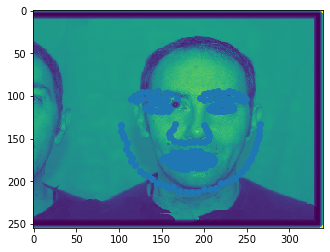

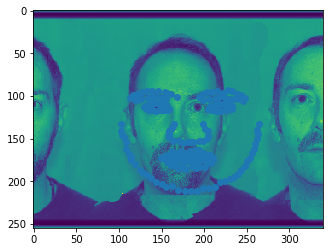

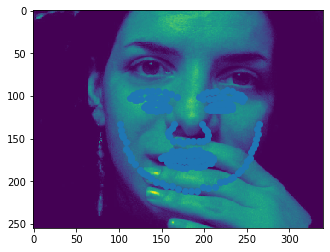

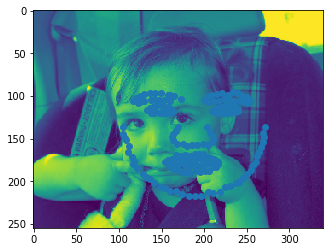

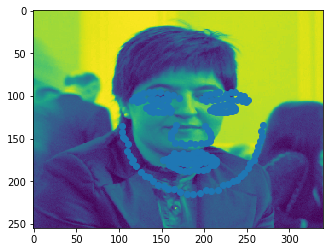

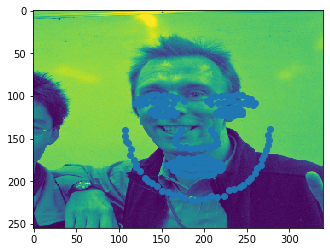

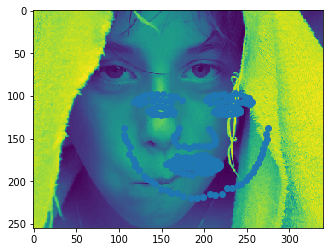

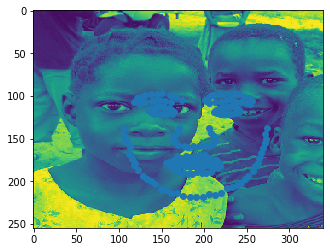

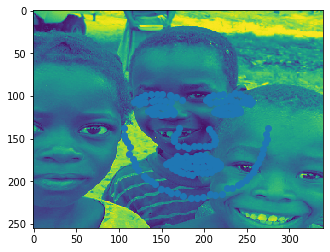

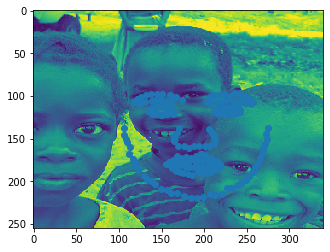

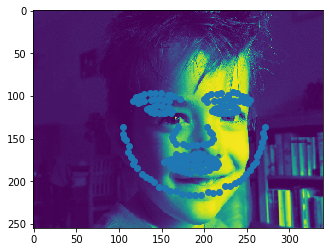

In [0]:
for i in range(20):
  plt.imshow(t_validation_x[i].view(255,340))
  x, y = get_co(output_array[i])
  plt.scatter(x, y)
  plt.show()

In [0]:

output_array = output.cpu().detach().numpy()

In [0]:
output_array.shape

(240, 193, 2)